In [1]:
import pickle
import argparse
import xgboost as xgb
import multiprocessing
import pandas as pd
from utils import *

In [2]:
import matplotlib as mpl
import pylab as plt
%matplotlib inline 



## internal feature importance

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

there are 3 different options.


- Weight. The number of times a feature is used to split the data across all trees.
- Cover. The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits.
- Gain. The average training loss reduction gained when using a feature for splitting.


it seems that gain makes a lot of sense here (though this is realted to only training)
This is similar (or equivalent) to the gini-feature importance in scikit-learn.

# many languages

In [3]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

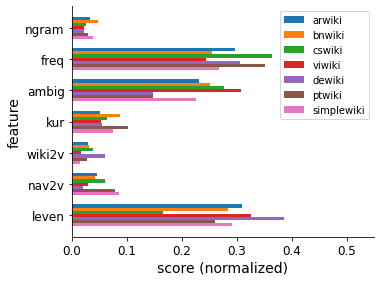

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

list_lang = ["arwiki","bnwiki","cswiki","viwiki","dewiki","ptwiki","simplewiki"]
for i_lang,lang in enumerate(list_lang):
    n_cpus_max = min([int(multiprocessing.cpu_count() / 4), 8])
    model = xgb.XGBClassifier(n_jobs=n_cpus_max)  # init model
    model.load_model("../../data/{0}/{0}.linkmodel.json".format(lang))  # load data
    features_labels = ["ngram", "freq", "ambig", "kur", "wiki2v", "nav2v", "leven",]
    features_scores = model.get_booster().get_score(importance_type='gain')

    x,y=[],[]

    for i,f in enumerate(features_labels):
        k = "f%s"%i
        v = features_scores.get(k,0)
        x += [f]
        y += [v]
    x = np.array(x)
    y = np.array(y)
    y = y/np.sum(y) # normalize
    
    
    h = 0.1
    offset = h*(i_lang-int(len(x)/2))
    x_plot = np.arange(0,len(x))
    y_plot = y[::-1]
    labels_plot = x[::-1]
    ax.barh(x_plot-offset, y_plot, height=h, label=lang)
ax.set_yticks(x_plot)
ax.set_yticklabels(features_labels[::-1])
ax.set_ylabel('feature')
ax.set_xlabel('score (normalized)')
ax.set_xlim(0,0.55)
ax.legend(loc='upper right',ncol=1)
plt.subplots_adjust(left=0.2, right=0.9, bottom=0.15, top=0.95)
# fig.savefig('results_feature-importance_all.pdf')

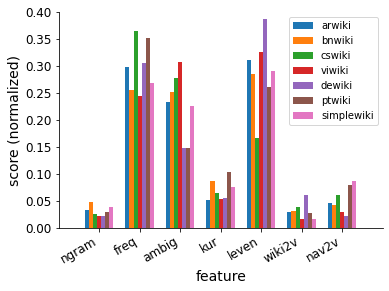

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)


ind_plot = [0,1,2,3,6,4,5]
list_lang = ["arwiki","bnwiki","cswiki","viwiki","dewiki","ptwiki","simplewiki"]
for i_lang,lang in enumerate(list_lang):
    n_cpus_max = min([int(multiprocessing.cpu_count() / 4), 8])
    model = xgb.XGBClassifier(n_jobs=n_cpus_max)  # init model
    model.load_model("../../data/{0}/{0}.linkmodel.json".format(lang))  # load data
    features_labels = ["ngram", "freq", "ambig", "kur", "wiki2v", "nav2v", "leven",]
    
    
    features_scores = model.get_booster().get_score(importance_type='gain')

    x,y=[],[]

    for i,f in enumerate(features_labels):
        k = "f%s"%i
        v = features_scores.get(k,0)
        x += [f]
        y += [v]
    x = np.array(x)
    y = np.array(y)
    y = y/np.sum(y) # normalize
    
    
    h = 0.1
    offset = h*(i_lang-int(len(x)/2))
    x_plot = np.arange(0,len(x))
    y_plot = y[ind_plot]
    ax.bar(x_plot+offset, y_plot, width=h, label=lang)
ax.set_xticks(x_plot)
ax.set_xticklabels(np.array(features_labels)[ind_plot],rotation=30,ha='right')
ax.set_xlabel('feature')
ax.set_ylabel('score (normalized)')
ax.set_ylim(0,0.4)
ax.set_xlim(-1,7.)

ax.legend(loc='upper right',ncol=1)
plt.subplots_adjust(left=0.15, right=0.9, bottom=0.2, top=0.95)
fig.savefig('results_feature-importance_all.pdf')